# Page View Time Series Visualizer: FCC Forum Daily Page Views

**Author:** Hamed Ahmadinia  
**Date:** 12.5.2024

This notebook is designed to visualize a time series of daily page views from the FCC Forum. 
The goal of this analysis is to clean the data and create meaningful plots to understand trends and variations over time. 
We will use various visualization techniques, such as line plots, box plots, and bar plots, to uncover insights from the page views data.

In [26]:
### Step 1: Importing Necessary Libraries
# We start by importing the necessary Python libraries for data analysis and visualization. 
#- `pandas` will help us handle data in tabular form.
#- `matplotlib` and `seaborn` will be used to generate visualizations.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
### Step 2: Loading the Dataset
# We load the dataset containing daily page views from the FCC Forum. 
# The dataset includes two columns: 'date' and 'value', where 'value' represents the number of page views.

df = pd.read_csv('fcc-forum-pageviews.csv')

In [30]:
### Step 3: Converting Date Column to Datetime Format
# Next, we convert the 'date' column to a `datetime` format and set it as the index. 
# This is important for time series analysis as it allows us to handle the data more efficiently when visualizing trends over time.

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [32]:
### Step 4: Cleaning the Data
# In this step, we clean the dataset by removing outliers. Specifically, we remove days where the number of page views falls in the top or bottom 2.5% of the data. 

lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

In [34]:
### Step 5: Defining the Function to Draw the Line Plot
# We define a function to draw a line plot that visualizes the daily page views over time. The line plot will show how page views fluctuate from day to day, helping us observe trends and any seasonal variations.

def draw_line_plot():
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the data
    ax.plot(df_cleaned.index, df_cleaned['value'], color='red', linewidth=1)

    # Set title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save and return the figure
    fig.savefig('line_plot.png')
    return fig

In [36]:
### Step 6: Defining the Function to Draw the Bar Plot
# This function creates a bar plot to show the average daily page views for each month, grouped by year. Bar plots help us compare the monthly data across years to see if there are any noticeable patterns.

def draw_bar_plot():
    # Prepare data for bar plot
    df_bar = df_cleaned.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Create the bar plot
    fig = sns.catplot(data=df_bar, x='year', y='value', hue='month', kind='bar', height=6, aspect=1.5, palette='tab10')
    fig.set_axis_labels('Years', 'Average Page Views')
    fig.set_titles('Monthly Average Page Views per Year')

    # Save and return the figure
    fig.savefig('bar_plot.png')
    return fig

In [38]:
### Step 7: Defining the Function to Draw Box Plots
# We create two box plots: one to show the distribution of page views per year and another to show the distribution per month. Box plots provide a summary of the distribution, highlighting the median, quartiles, and potential outliers.

def draw_box_plot():
    # Prepare data for box plots
    df_box = df_cleaned.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.strftime('%b')

    # Sort the months in calendar order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Year-wise box plot
    sns.boxplot(data=df_box, x='year', y='value', ax=ax[0])
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')

    # Month-wise box plot
    sns.boxplot(data=df_box, x='month', y='value', order=month_order, ax=ax[1])
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')

    # Save and return the figure
    fig.savefig('box_plot.png')
    return fig

C:\Users\hamed\AppData\Local\Temp\ipykernel_16668\2661815934.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  line_plot.show()


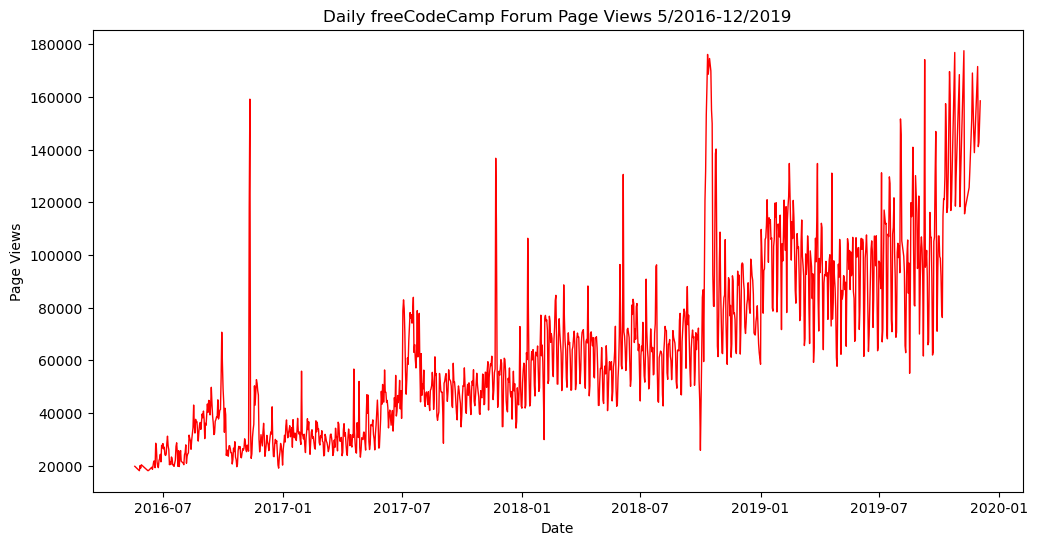

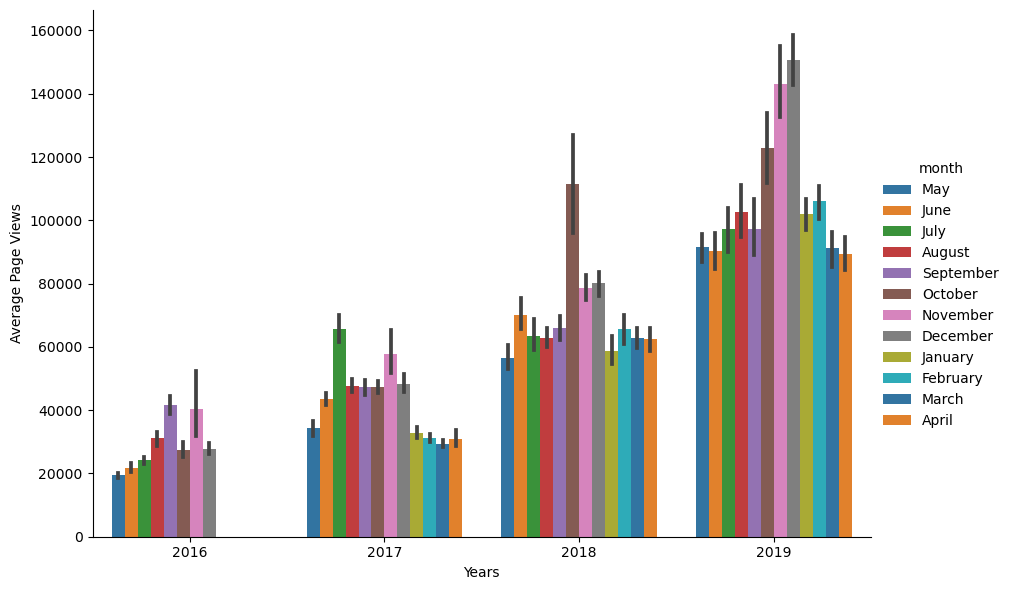

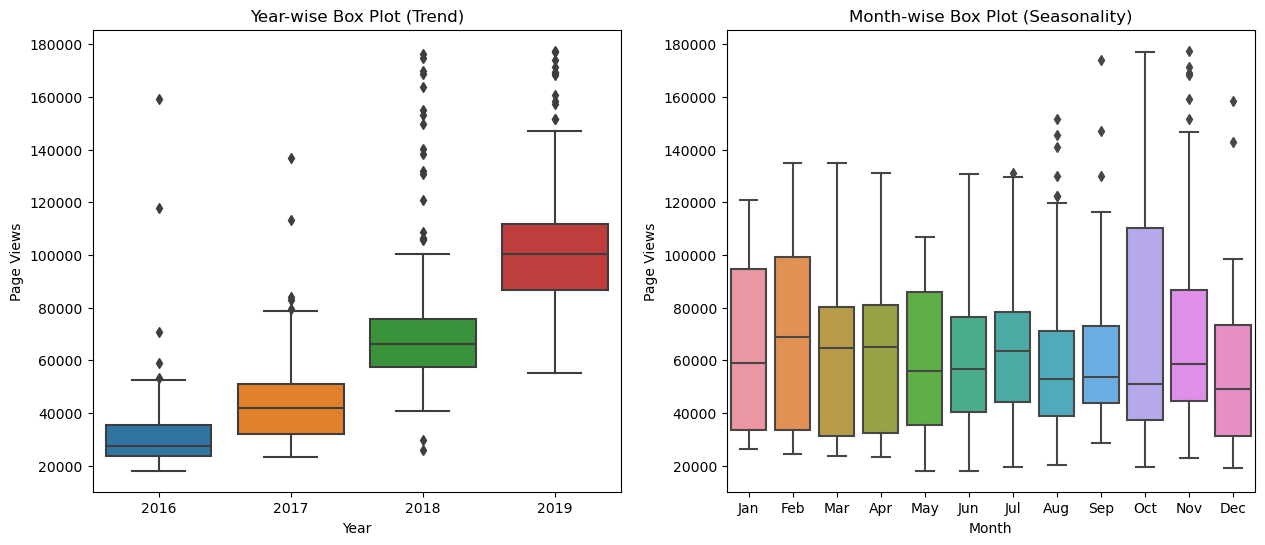

In [40]:
### Step 8: Generating and Saving the Plots
# In this final step, we call the functions defined earlier to generate the line plot, bar plot, and box plots. 

# Generate and save the plots
line_plot = draw_line_plot()
bar_plot = draw_bar_plot()
box_plot = draw_box_plot()

# Display the plots
line_plot.show()

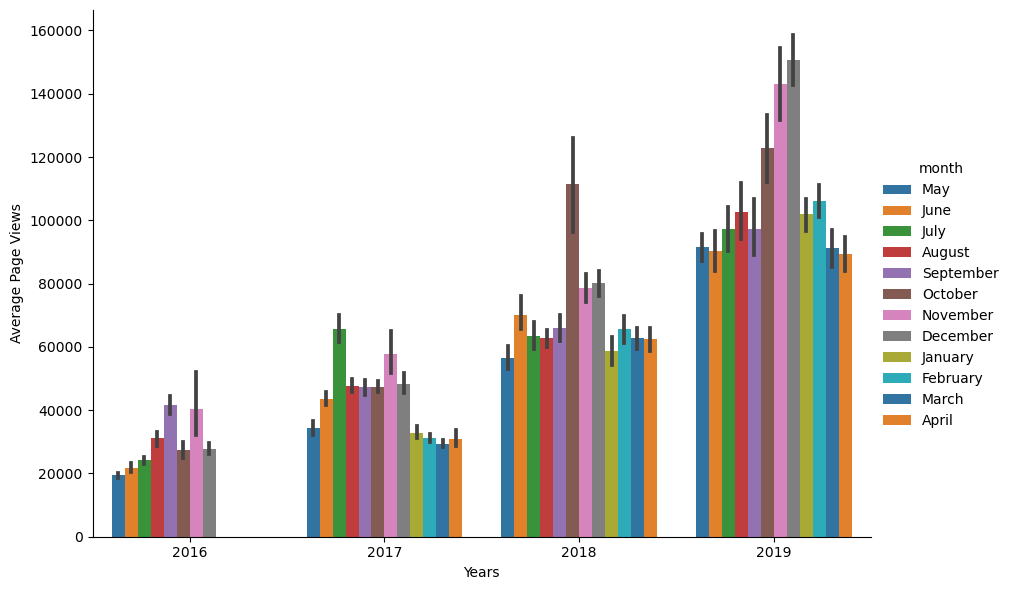

In [41]:
draw_bar_plot()

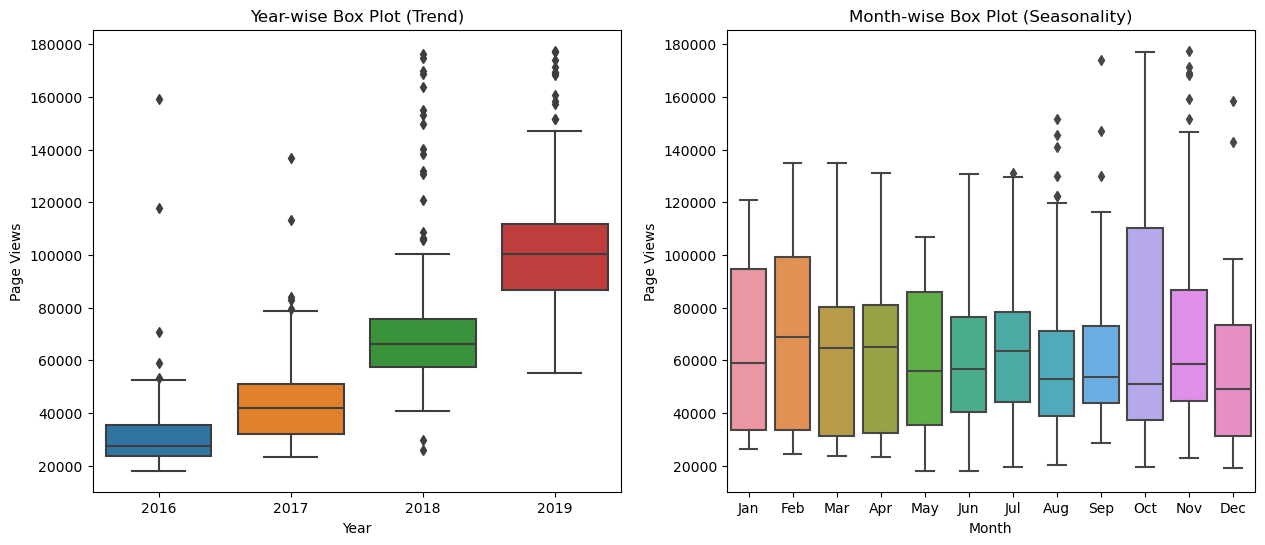

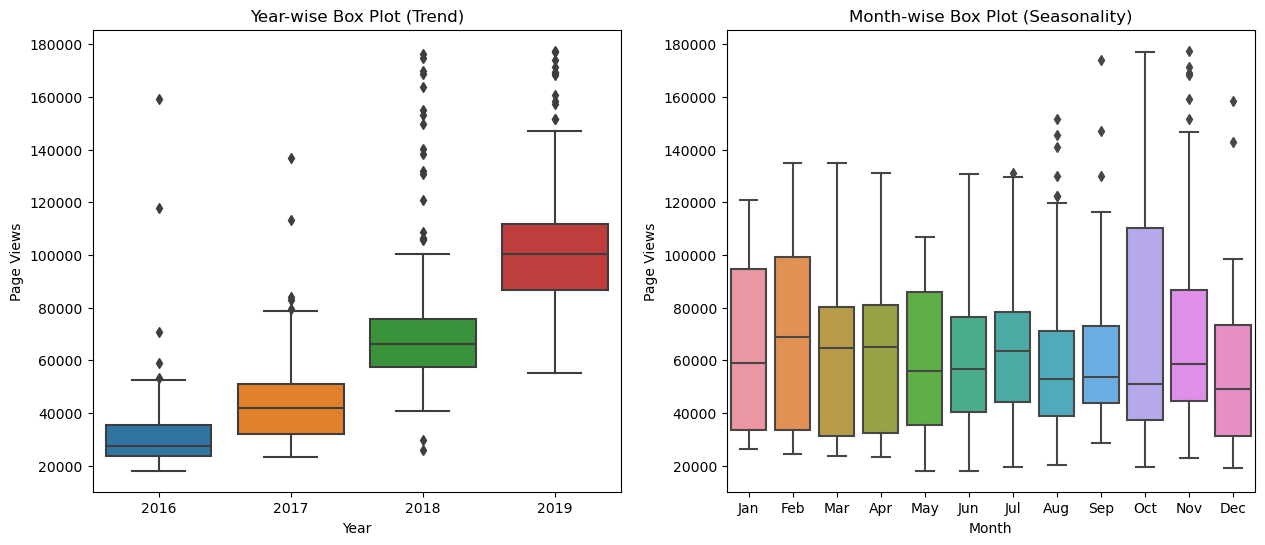

In [42]:
draw_box_plot()